In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive





[Ref](https://github.com/kroosen/GAN-in-keras-on-mnist)

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam, RMSprop
import numpy as np
import matplotlib.pyplot as plt
import random
from keras.layers import *
from tqdm import tqdm_notebook
import pandas as pd
from keras.utils import plot_model, to_categorical

# Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

Using TensorFlow backend.


In [0]:
cd /content

/content


In [0]:
# cd /content/drive/My\ Drive/faraji/digikala

In [3]:
cd /content/drive/My Drive/zahra_Nafarieh/Digicala_NLP

/content/drive/My Drive/zahra_Nafarieh/Digicala_NLP


In [0]:

df_train = pd.read_excel('data_upsample.xlsx')
X_train = df_train['comment']
y_train = df_train['target']

In [0]:
x_train_0 = df_train[ df_train['target']==0 ]['comment']
x_train_1 = df_train[ df_train['target']==1 ]['comment']
x_train_2 = df_train[ df_train['target']==2 ]['comment']
x_train_3 = df_train[ df_train['target']==3 ]['comment']

In [6]:
X_g = pd.concat([x_train_0,x_train_1])
X_d = pd.concat([x_train_2 ,x_train_3])

X_g.shape

(114494,)

In [0]:
num_features=50
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_features)
tokenizer.fit_on_texts(X_d)
tokenizer.fit_on_texts(X_g)

data_d = tokenizer.texts_to_sequences(X_d)
latent_g = tokenizer.texts_to_sequences(X_g)


d_data = pad_sequences(data_d, padding = "post", maxlen =64)
g_latent = pad_sequences(latent_g, padding = "post", maxlen =64)

In [8]:
# X_g=X_g[:60000]
g_latent.shape , d_data.shape #, X_train.shape

((114494, 64), (114494, 64))

In [0]:
# Preprocessing

# X_train = X_train.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train = X_train.astype('float32')/255
# X_test = X_test.astype('float32')/255




# print(X_train.shape, y_train.shape)
# #convert y to one hot vector
# y_train =tf.keras.utils.to_categorical(y_train)
# # Split train data into train and validation
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4)
# print(x_train.shape, y_train.shape)


In [9]:
# Set the dimensions of the noise
z_dim = 64
print ("z_dim is zzzzz:{} , zzzzzz:{}".format(z_dim , z_dim) )

z_dim is zzzzz:64 , zzzzzz:64


In [0]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

In [11]:
#Genaraitor
g = Sequential()
g.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(Reshape((2, 2, 64)))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Conv2DTranspose(56, 5, strides=2, padding='same'))
#@@@@@
g.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Conv2DTranspose(1, 5, strides=2, padding='same', activation='softmax'))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
g.add(Reshape((1,64)))
g.add(LSTM(256, input_shape=(1,64)))
#@@@@@
g.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
g.add(Dense(64, activation='sigmoid'))  # Values between 0 and 1
g.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )





# #GAN
# d.trainable = False
# inputs = Input(shape=(z_dim, ))
# hidden = g(inputs)
# output = d(hidden)
# gan = Model(inputs, output)
# gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
ls

 2_Model.ipynb                            discriminator.png
 adversarial.png                          GAN/
 CNN_model_4.h5                           generaitor.png
'Comment_Text Exploration3.ipynb'         generator.png
'Confusiom matrix_NaiveBayes.png'         images/
'Confusiom matrix.png'                    Model.ipynb
'Copy of Part-01.ipynb'                   nlp.zip
 data_upsample.xlsx                       others_model/
 Digi_2.xlsx                              Output.txt
 digi_clean2.xlsx                         text/
 digi_clean.xlsx                          WordCloud.ipynb
'disadvanteges_Text Exploration3.ipynb'


In [29]:
cd /content/drive/My Drive/zahra_Nafarieh/Digicala_NLP/GAN/GAN_NLP/vafaie_sadr/MY_GAN/

/content/drive/My Drive/zahra_Nafarieh/Digicala_NLP/GAN/GAN_NLP/vafaie_sadr/MY_GAN


In [30]:
ls

 1-zahra-GANs.ipynb          3-zahra-GANs.ipynb
'2-2-zahra-GANs (1).ipynb'   4-zahra-GANs.ipynb
 2-2-zahra-GANs.ipynb       'Copy of 2-2-zahra-GANs.ipynb'
'3-zahra-GANs (1).ipynb'     faraji_GAN.ipynb


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
reshape_1 (Reshape)          (None, 2, 2, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2, 2, 64)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 4, 4, 56)          89656     
_________________________________________________________________
dense_2 (Dense)              (None, 4, 4, 512)         29184     
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 512)        

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


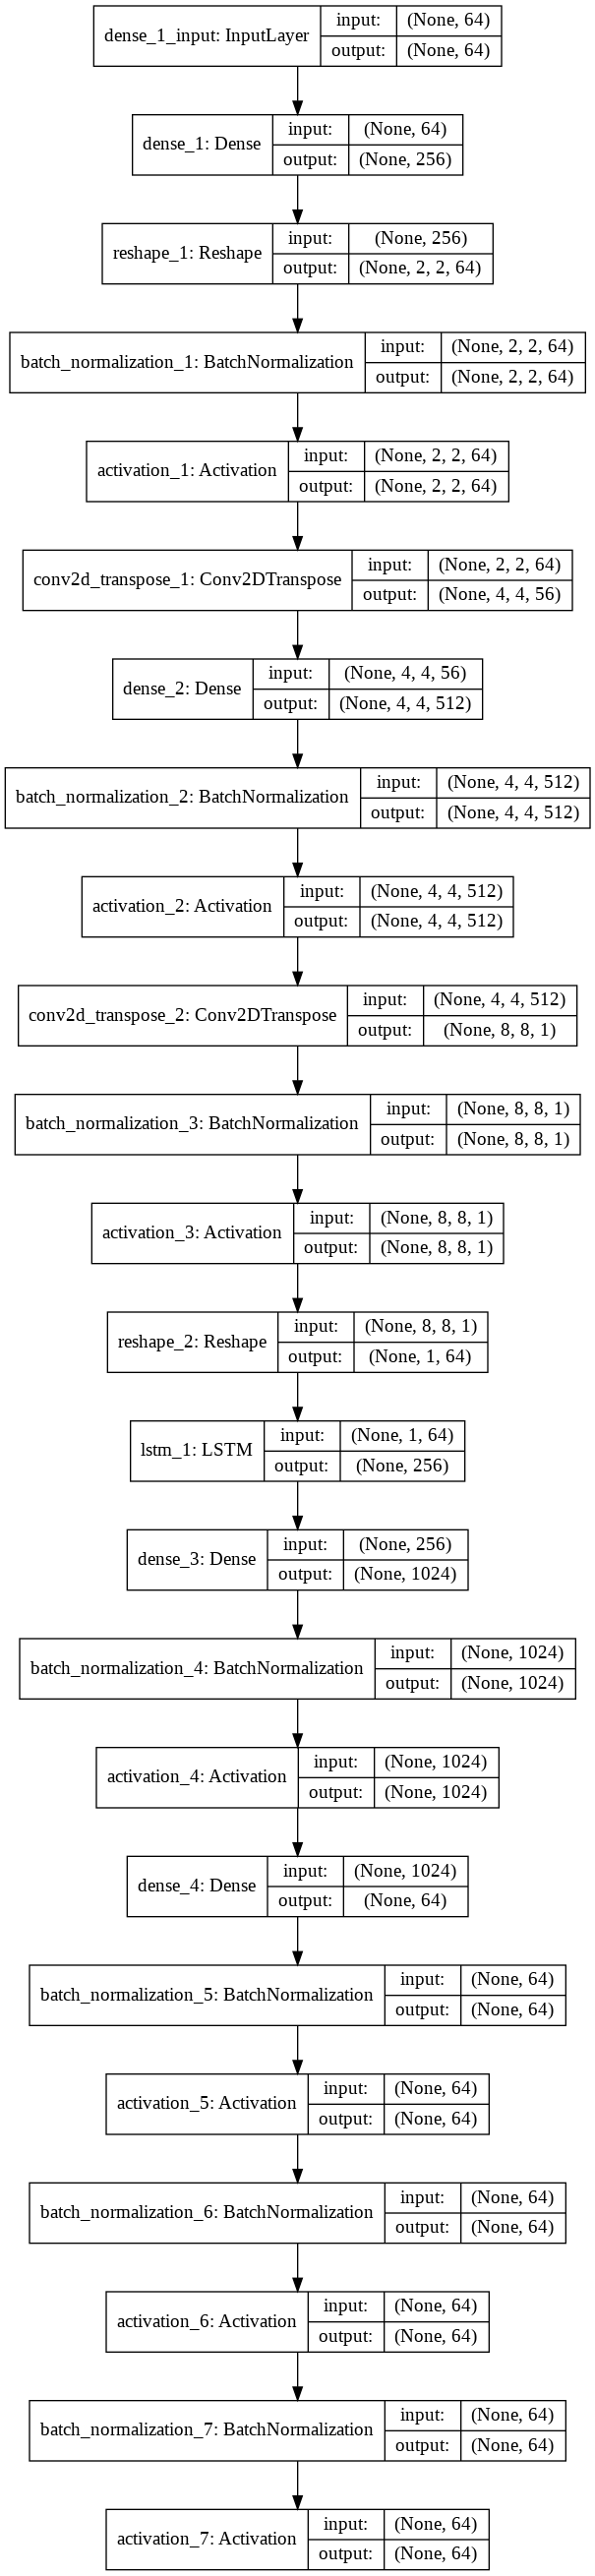

In [31]:
g.summary()
plot_model(g, to_file='generaitor.png', show_shapes=True)


In [17]:
#Discriminator
d = Sequential()
d.add(Dense(1024, input_dim=64, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
#@@@@@
g.add(BatchNormalization())
g.add(Activation(LeakyReLU(alpha=0.2)))
#@@@@@
d.add(Dropout(0.3))
d.add(Dense(1, activation='sigmoid'))  # Values between 0 and 1
d.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/activations.py:235: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


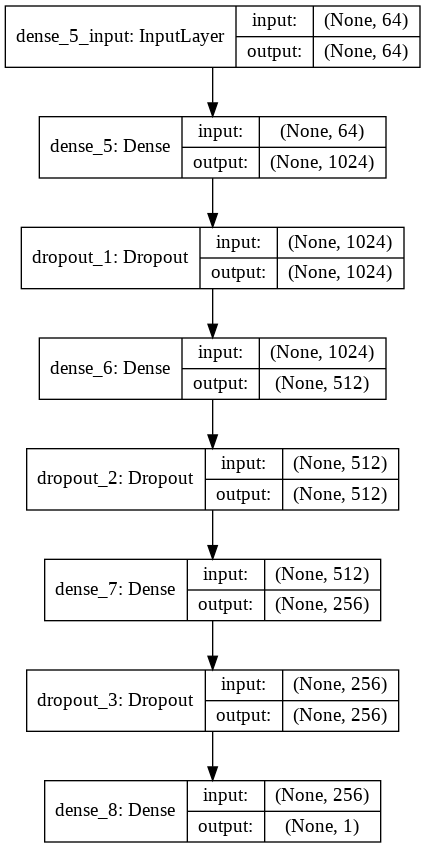

In [32]:
d.summary()
plot_model(d, to_file='discriminator.png', show_shapes=True)

In [0]:
#GAN
d.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = g(inputs)
output = d(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy']  )

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 64)                812925    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 722945    
Total params: 1,535,870
Trainable params: 809,339
Non-trainable params: 726,531
_________________________________________________________________


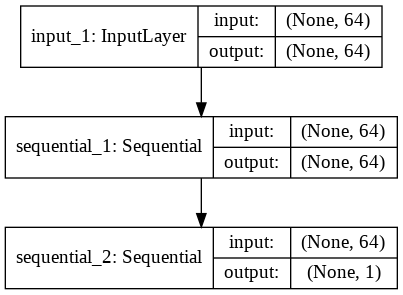

In [34]:
gan.summary()
plot_model(gan, to_file='GAN.png', show_shapes=True)

In [0]:
def plot_loss(losses):
    """
    @losses.keys():
        0: loss
        1: accuracy
    """
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    #d_acc = [v[1] for v in losses["D"]]
    #g_acc = [v[1] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    #plt.plot(d_acc, label="Discriminator accuracy")
    #plt.plot(g_acc, label="Generator accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    


    
# def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
#     noise = np.random.normal(0, 1, size=(n_ex, z_dim))
#     generated_images = g.predict(noise)
#     generated_images = generated_images.reshape(n_ex, 28, 28)

#     plt.figure(figsize=figsize)
#     for i in range(generated_images.shape[0]):
#         plt.subplot(dim[0], dim[1], i+1)
#         plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
#         plt.axis('off')
#     plt.tight_layout()
#     plt.show()


In [0]:
# # Set up a vector (dict) to store the losses
# losses = {"D":[], "G":[]}

# def train(epochs=10, plt_frq=1, BATCH_SIZE=128):
#     batchCount = int(d_data.shape[0] / BATCH_SIZE)
#     # print('Epochs:', epochs)
#     # print('Batch size:', BATCH_SIZE)
#     # print('Batches per epoch:', batchCount)
    
#     for e in tqdm_notebook(range(1, epochs+1)):
#         if e == 1 or e%plt_frq == 0:
#             print('-'*15, 'Epoch %d' % e, '-'*15)
#         for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
#             # Create a batch by drawing random index numbers from the training set
#             text_batch = d_data[np.random.randint(0, d_data.shape[0], size=BATCH_SIZE)]
#             # Create noise vectors for the generator

#             #@@@@@@@@@
#             # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
#             noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]
#             #@@@@@@@
#             # Generate the images from the noise
#             generated_texts = g.predict(noise)
#             # print("noise.shape ,text_batch.shape , generated_texts.shape" , noise.shape ,text_batch.shape , generated_texts.shape )

#             X = np.concatenate((text_batch, generated_texts))
#             # Create labels
#             y = np.zeros(2*BATCH_SIZE)
#             y[:BATCH_SIZE] = 1#0.9  # One-sided label smoothing
#             #@@@@@@@@
#             ####

#             # Train discriminator on generated images
#             d.trainable = True
#             d_loss = d.train_on_batch(X, y)
#             #@@@@@@@@
#             log = f'step:{e}       dis[loss:{d_loss}]'

#             # Train generator
#             # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
#             noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]
#             #@@@@@@
#             y2 = np.ones(BATCH_SIZE)
#             # d.trainable = False
#             d.trainable = False

#             # g_loss = gan.train_on_batch(noise, y2)
#             g_loss = gan.train_on_batch(noise, y2)
#             #@@@@@@@@
#             log += f'                                gen[loss:{g_loss} ]'
#             print(log)
#             #@@@@@@@
#             # l, l_rf, acc_rf, l_labels, acc_labels = gan.train_on_batch(noise, y2)  

#         # Only store losses from final batch of epoch
#         losses["D"].append(d_loss)
#         losses["G"].append(g_loss)

#         # Update the plots
#         # if e == 1 or e%plt_frq == 0:
#             # plot_generated()
#         #@@@@@
#         # print(log)

#     plot_loss(losses)

In [0]:
# Set up a vector (dict) to store the losses
losses = {"D":[], "G":[]}

def train(epochs, plt_frq, BATCH_SIZE):
    batchCount = int(d_data.shape[0] / BATCH_SIZE)
    # print('Epochs:', epochs)
    # print('Batch size:', BATCH_SIZE)
    # print('Batches per epoch:', batchCount)
    
    for e in tqdm_notebook(range(1, epochs+1)):
        if e == 1 or e%plt_frq == 0:
            print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in range(batchCount):  # tqdm_notebook(range(batchCount), leave=False):
            # Create a batch by drawing random index numbers from the training set
            text_batch = d_data[np.random.randint(0, d_data.shape[0], size=BATCH_SIZE)]
            # Create noise vectors for the generator

            #@@@@@@@@@
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]
            #@@@@@@@
            # Generate the images from the noise
            generated_texts = g.predict(noise)
            # print("noise.shape ,text_batch.shape , generated_texts.shape" , noise.shape ,text_batch.shape , generated_texts.shape )

            X = np.concatenate((text_batch, generated_texts))
            # Create labels
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 1#0.9  # One-sided label smoothing
            #@@@@@@@@
            ####

            # Train discriminator on generated images
            d.trainable = True
            d_loss = d.train_on_batch(X, y)

            # Train generator
            # noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            noise = g_latent[np.random.randint(0, g_latent.shape[0], size=BATCH_SIZE)]
            #@@@@@@
            y2 = np.ones(BATCH_SIZE)
            d.trainable = False
            g_loss = gan.train_on_batch(noise, y2)

        # Only store losses from final batch of epoch
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)

        # Update the plots
        # if e == 1 or e%plt_frq == 0:
            # plot_generated()
    plot_loss(losses)

Epochs: 5


--------------- Epoch 1 ---------------



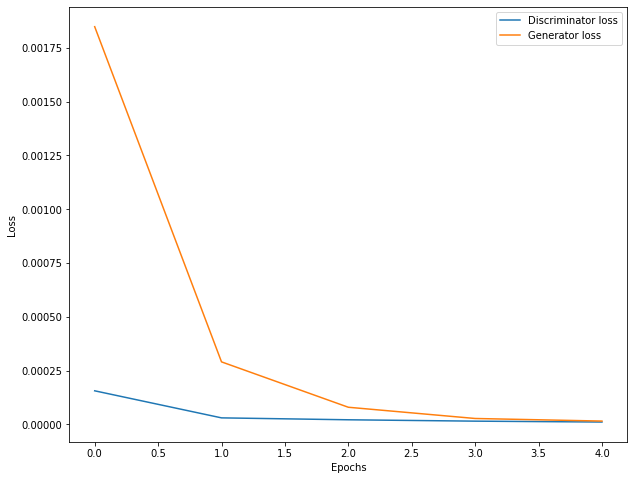

In [0]:
train(epochs=5, plt_frq=20, BATCH_SIZE=128)

In [0]:
losses

{'D': [[0.00015650888, 1.0],
  [3.0779767e-05, 1.0],
  [2.1902782e-05, 1.0],
  [1.553373e-05, 1.0],
  [1.1434333e-05, 1.0]],
 'G': [[0.0018482361, 1.0],
  [0.00029094244, 1.0],
  [8.0097656e-05, 1.0],
  [2.7910002e-05, 1.0],
  [1.5887921e-05, 1.0]]}

[GAN — Ways to improve GAN performance](https://towardsdatascience.com/gan-ways-to-improve-gan-performance-acf37f9f59b)

![](https://miro.medium.com/max/1200/1*8dMXLw6Z3pCozGHrZxLOrA.png)